## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 4: Linear Algebra
## Due 30 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Linear Algebra, for example covered in the following online books:
    - [Beezer](http://linear.ups.edu/html/fcla.html). Does not cover matrix exponentials, Caley-Hamilton, SVD, or PCA.
    - [Hefferon](http://joshua.smcvt.edu/linearalgebra/book.pdf). Also does not cover the above.
- The more advanced ideas are covered online as well. For example:
    - Matrix Exponentials are typically not covered until a course on linear different equations. But the [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_exponential) is pretty good.
    - [Caley-Hamilton](https://brilliant.org/wiki/cayley-hamilton-theorem/)
    - [SVD](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)
    - [PCA](https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
- If you want the **best** textbooks in linear algebra, get
    - [Strang](https://www.amazon.com/Introduction-Linear-Algebra-Gilbert-Strang/dp/0980232775). Introductory. See also [Strang's Online Lectures](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/).
    - [Horn and Johnson](http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf)

In [2]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

### 1. Linear independence 

Which of the following sets of vectors are linearly independent? Why?

a) $\left (
\begin{array}{c}
1 \\
2 \\
3 \\
4
\end{array}
\right )$ and $\left (
\begin{array}{c}
5 \\
6 \\
7 \\
8
\end{array}
\right )$

b) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
1 \\
0 \\
0 \\
1
\end{array}
\right )$

c) $\left (
\begin{array}{c}
1 \\
1 \\
0 \\
0
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
0 \\
1 \\
1
\end{array}
\right )$, $\left (
\begin{array}{c}
0 \\
1 \\
1 \\
0
\end{array}
\right )$ and $\left (
\begin{array}{c}
0 \\
1 \\
0 \\
1
\end{array}
\right )$

For a set of vectors to be linearly independent, the number of leading ones has to equal the number of vectors. (i.e. The row reduced echelon form of the matrix of these vectors stacked horizontally has two leading ones.) 

In [4]:
#EXAMPLE

'''
rref returns a tuple of two elements. The first is the reduced row echelon form, 
and the second is a tuple of indices of the pivot columns.
'''
x = np.array([[1],[2],[3],[4]])
y = np.array([[1],[2],[3],[4]])
A = np.hstack([x,y])

A = sm.Matrix(A)
print('The rank of A is ', A.rank(),'and the column dimension is', np.shape(A)[1])
A.rref()

The rank of A is  1 and the column dimension is 2


⎛⎡1  1⎤      ⎞
⎜⎢    ⎥      ⎟
⎜⎢0  0⎥      ⎟
⎜⎢    ⎥, (0,)⎟
⎜⎢0  0⎥      ⎟
⎜⎢    ⎥      ⎟
⎝⎣0  0⎦      ⎠

In [5]:
sm.Rational(1,2)

1/2

 Recall that a set of $n$ vectors of length $n$ is linearly independent if the matrix with these vectors as columns has a non-zero determinant. We show this in python below.

In [12]:
#EXAMPLE
a = np.array([[1],[1],[0],[0]])
b = np.array([[1],[1],[1],[0]])
c = np.array([[0],[1],[1],[1]])
d = np.array([[0],[0],[1],[1]])

A = np.hstack([a,b,c,d])
print(A)
#Now check in sympy
A = sm.Matrix(A)
A.det()

[[1 1 0 0]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 1 1]]


-1

### 2. Orthogonality

a) Find two orthogonal vectors that are also orthogonal to the vector
$v = \left (
\begin{array}{c}
1 \\
-1 \\
3 \\
\end{array}
\right ).$

b) Argue that the resulting set of three vectors form a basis for for $\mathbb{R}^3$.

c) Express the vector $x = \left (
\begin{array}{c}
1 \\
2 \\
3
\end{array}
\right )$ as a linear combination of your three vectors. 

2.a)

We're looking for all vectors $w$ that satisfy $v \cdot w = 0 $ for $x,y,z\in \mathbb{R}:$
$$0 = 
    \begin{pmatrix} 1 & -1 & 3 \end{pmatrix} \cdot
    \begin{pmatrix} x \\ y \\ z \end{pmatrix} 
$$
Geometrically, this means vectors in the plane $$x-y+3z = 0.$$

Let's try $w =\begin{pmatrix} 1 \\ 4 \\ 1 \end{pmatrix}$. Then we can write a new equation for two planes and set them both equal to 0:

$$x-y+3z = 0 = x(1) + y(4) + z(1)$$

Now we get $5y=2z$ and choose valid values for $y,z$.

Afterwards, isolate $x$ in the plane equation and plug in your $y,z$ values!

In [52]:
v = np.array([[1],[-1],[3]])# are column vectors
#w = np.array([[1],[1],[0]])
#u = np.array([[-3/2],[3/2],[1]])# This one is hard to get! The example here is only orthogonal to v
w = np.array([[4],[7],[1]])
u = np.array([[-2],[1],[1]])


#Check if orthogonal
v.transpose()@w, v.transpose()@u, u.transpose()@w # @ means dot product in python

(array([[0]]), array([[0]]), array([[0]]))

2.b)

Recall the definition of a basis: 

A linearly independent set of vectors $v_1,...,v_n$ is a **basis** for a vector space $V$ if $span(v_1,...,v_n) = V$. (i.e. if $v_1,...,v_n$ are mutually orthogonal and $dim(V) = n$). 


2.c)

Notice that **in our standard basis i, j, k:**
$$x = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = 
1 \hat i + 2\hat j + 3 \hat k\\
= 
a_1\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} + 
a_2\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} +
a_3\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$$
can be reexpressed as $x = Az:$

$$\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}
= \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}
\begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix}$$

We want to find
$$z = \begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix}.$$

Notice that the three new orthogonal vectors we found can be our new basis
$$\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = 
a_1\begin{pmatrix} 1 \\ -1 \\ 3 \end{pmatrix} +
a_2\begin{pmatrix} 1 \\ 4 \\ 1 \end{pmatrix} +
a_3\begin{pmatrix} u_1 \\ u_2 \\ u_3 \end{pmatrix}$$
can be reexpressed as $b = Ax$

We can solve this quickly by running this linear system through a solver.

In [55]:
A = np.hstack([v,w,u])
b = np.array([1,2,3])
a1, a2, a3 = np.linalg.solve(A,b) #numerically solve for the coeffecients

a1, a2, a3

(0.7272727272727272, 0.31818181818181823, 0.5)

$dim(\mathbb{R}^3) = rank(b) = 3$

### 3. Magnitude

Recall the set of rotation matrices defined by

$$
R(\theta) = 
\begin{pmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{pmatrix}.
$$

for each $\theta \in \mathbb{R}$. Show that if $x \in \mathbb{R}^2$ that the magnitude of $x$ is equal to the magnitude of $R(\theta)x$ for all $\theta$. Thus, rotations do not affect magnitudes. 

We begin with the definition of magnitude. Let $\theta \in \mathbb{R},$ and $x\in \mathbb{R}^2$. Then we have
$$\begin{align}
||R(\theta)x|| &= \sqrt{(R(\theta)x)^T(R(\theta)x)} \\
\end{align} 
$$


In [153]:
#In sympy
o = sm.symbols('theta')
R = sm.Matrix([[sm.cos(o), sm.sin(o)],[-sm.sin(o), sm.cos(o)]])
R.transpose()@R 

⎡   2         2                      ⎤
⎢sin (θ) + cos (θ)          0        ⎥
⎢                                    ⎥
⎢                      2         2   ⎥
⎣        0          sin (θ) + cos (θ)⎦

### 4. Inverses

Find the inverse of each of the following matrices, or explain why no inverse exists.

$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & -1 & 0
\end{pmatrix}
$

4.a)



In [12]:
A = np.array([[1,0,0],[0,1,0],[0,0,1]])
detA = np.linalg.det(A)
print('The determinant is',detA)
np.linalg.inv(A)

The determinant is 1.0


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

4.b)



In [11]:
Y = np.array([[1,1,1],[1,1,1],[1,1,1]])
detB = np.linalg.det(B)
try:
    np.linalg.inv(B)
except:
    print('The determinant is',detB,'therefore B is a singular matrix, and has no inverse.')

The determinant is 0.0 therefore B is a singular matrix, and has no inverse.


### 5. Commutativity

In three dimensions, there are three different kinds of rotations, one for rotation about each axis. These are defined as follows:

$$
R_x(\theta) = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & \cos \theta  & \sin \theta  \\
0 & -\sin \theta & \cos \theta 
\end{pmatrix}.
$$

$$
R_y(\theta) = 
\begin{pmatrix}
\cos \theta  & 0 & \sin \theta \\
0 & 1 & 0 \\
-\sin \theta & 0 & \cos \theta 
\end{pmatrix}.
$$

$$
R_z(\theta) = 
\begin{pmatrix}
\cos \theta  & \sin \theta & 0 \\
-\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

Are these matrices pairwise commutative in general? That is: Is it the case that

$$
R_x(\theta_1)R_y(\theta_2) = R_y(\theta_2)R_x(\theta_1)
$$

and similarly for $x,z$ and $y,z$? Explain your answer.

In [51]:
o1, o2 = sm.symbols('theta1 theta2')

Rx1 = sm.Matrix([[1, 0, 0],[0, sm.cos(o1), sm.sin(o1)],[0, -sm.sin(o1), sm.cos(o1)]])

Ry2 = sm.Matrix([[sm.cos(o2), 0, sm.sin(o2)],[0, 1, 0],[-sm.sin(o2), 0, sm.cos(o2)]])

Rz2 = sm.Matrix([[sm.cos(o2), sm.sin(o2), 0],[-sm.sin(o2), sm.cos(o2), 0], [0, 0, 1]])

#Define Ry2 and Rz2

#Check by doing the multiplication. for example

Rx1 @ Ry2, Ry2 @ Rx1

⎛⎡    cos(θ₂)          0          sin(θ₂)    ⎤  ⎡cos(θ₂)   -sin(θ₁)⋅sin(θ₂)  s
⎜⎢                                           ⎥  ⎢                             
⎜⎢-sin(θ₁)⋅sin(θ₂)  cos(θ₁)   sin(θ₁)⋅cos(θ₂)⎥, ⎢   0          cos(θ₁)        
⎜⎢                                           ⎥  ⎢                             
⎝⎣-sin(θ₂)⋅cos(θ₁)  -sin(θ₁)  cos(θ₁)⋅cos(θ₂)⎦  ⎣-sin(θ₂)  -sin(θ₁)⋅cos(θ₂)  c

in(θ₂)⋅cos(θ₁)⎤⎞
              ⎥⎟
   sin(θ₁)    ⎥⎟
              ⎥⎟
os(θ₁)⋅cos(θ₂)⎦⎠

### 6. Orthogonal Matrices

The set of reflection matrices is defined by

$$
S(\theta) = 
\begin{pmatrix}
\cos 2\theta & \sin 2 \theta \\
\sin 2\theta & -\cos 2 \theta
\end{pmatrix}.
$$

a) Show how $S(\frac{\pi}{4})$ transforms the vector $(1\;-1)^T$. 

b) Show that $S(\theta)$ does not change any vectors that happen to lie on the axis of reflection.

c) Show that these matrices are orthogonal for all $\theta$. 

In [27]:
S = lambda arg: sm.Matrix([[sm.cos(2*arg), sm.sin(2*arg)],
                           [sm.sin(2*arg),-sm.cos(2*arg)]])
v = sm.Matrix([[1],[-1]])
v, S(sm.pi / 4), S(sm.pi / 4)@v

⎛⎡1 ⎤  ⎡0  1⎤  ⎡-1⎤⎞
⎜⎢  ⎥, ⎢    ⎥, ⎢  ⎥⎟
⎝⎣-1⎦  ⎣1  0⎦  ⎣1 ⎦⎠

Let's apply $S(\frac{\pi}{4})$ to $\begin{pmatrix} x \\ y \end{pmatrix}:$

$$
\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
= 
(x)\begin{pmatrix} 0 \\ 1 \end{pmatrix} +
(y)\begin{pmatrix} 1 \\ 0 \end{pmatrix}
 = \begin{pmatrix} y \\ x \end{pmatrix}$$

In [43]:
o = sm.symbols('theta')
S_theta = sm.Matrix([[sm.cos(2*o), sm.sin(2*o)],[sm.sin(2*o), -sm.cos(2*o)]])
x_vec = sm.Matrix([[sm.cos(o)],[sm.cos(o)]])
S_theta @ x_vec

⎡sin(2⋅θ)⋅cos(θ) + cos(θ)⋅cos(2⋅θ)⎤
⎢                                 ⎥
⎣sin(2⋅θ)⋅cos(θ) - cos(θ)⋅cos(2⋅θ)⎦

### 7. Similarity

Show that the following two matrices are similar.

$
A = \begin{pmatrix}
2 & 4 & 6 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$

B = $
\begin{pmatrix}
1 & -1 & 2 \\
4 & 2 & 1 \\
5 & 1 & 1
\end{pmatrix}
$

In [46]:
A = sm.Matrix([[2,4,6],[0,2,0],[1,1,0]])

A.charpoly()

PurePoly(_lambda**3 - 4*_lambda**2 - 2*_lambda + 12, _lambda, domain='ZZ')

### 8. Diagonalization

Diagonalize the matrices in problem 7 (you can use `sympy`) and show they have the same diagonal form.

8)

Because `diagonalize` returns a tuple $(P,D)$, where $D$ is diagonal and $M=PDP^{−1}$, we can implement this easily in python.

In [13]:
A = sm.Matrix([[1, 0, 0],[0, 2, 0],[0, 0, 1]])
B = sm.Matrix([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
A.diagonalize()

⎛⎡1  0  0⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  0  1⎥, ⎢0  1  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  1  0⎦  ⎣0  0  2⎦⎠

In [14]:
B.diagonalize()

⎛⎡1  0  0⎤  ⎡1  0  0⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  1  0⎥, ⎢0  1  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  1⎦  ⎣0  0  1⎦⎠

### 9. Cayley Hamilton

a) Use the Cayley Hamilton Theorem to come up with an expression for $A^n$ in terms of $n$ when 

$$
A = \begin{pmatrix}
-\frac{1}{2} & 1  \\
0 & \frac{1}{4}
\end{pmatrix} .
$$

b) Define $x_{k+1} = A x_k$ and argue that no matter what value $x_0$ is, $x_k$ converges to $(0 \; 0)^T$. 

c) Choose $x_0 = (-2,3)^T$ and plot $x_k$ for $k = 0$ to $10$. Plot the two components of of $x_k$ as two separate trajectories overlaid on the same plot.

Hints:

$\bullet$ Begin by finding the characterist polynomial

$\bullet$ Next, substitute $s\leftarrow A$ into the equation

$\bullet$ Multiply both sides by powers of A until $A^n$ is reached

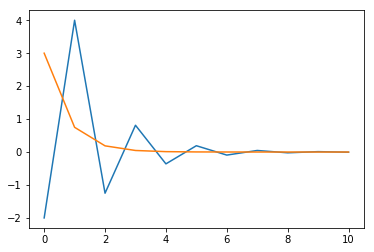

In [80]:
#k = [i for i in range(1,11)] #get k=0,...,10
k = np.arange(0,11)
x0 = np.array([[-2], [3]])

A = sm.Matrix([[sm.Rational(-1,2), 1],[0, sm.Rational(1,4)]]) 
xk1 = [] #put first x here
xk2 = [] # put first y here

for i in k:
    result = A**i @ x0 #the next sequence value
    xk1.append(result[0])
    xk2.append(result[1])

    
    
plt.plot(k,xk1)
plt.plot(k,xk2)

### 10. Matrix Exponential Properties
---

Recall that for matrices $A$ and $B$ that it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that 

a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.

b) Find an example in 2D where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

10.a)

Recall from lecture, when $A \in \mathbb{R}^{n\times n}$, then the we define the **matrix exponential** $e^{A}$ by
$$
e^{A} \triangleq I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots
$$
Now assume $AB=BA$. By using the definition we see

$$
%step 1
e^{A}e^{B} = (I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots)(I + B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots),
$$

and we can group the terms to use in a FOIL expansion

$$
%step 2: group terms
e^{A}e^{B} = [I + (A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots)][I + (B + \frac{B^2}{2!} + \frac{B^3}{3!} + \dots)].
$$



10.b)

We'll use two matrices from physics that are famous, the Pauli spin matrices:

$
\sigma_x = 
\begin{pmatrix}
0 & 1  \\
1 & 0
\end{pmatrix} 
$
and
$
\sigma_z = 
\begin{pmatrix}
1 & 0  \\
0 & -1
\end{pmatrix}, 
$
where:
$
\sigma_x\sigma_z = 
\begin{pmatrix}
0 & -1  \\
1 & 0
\end{pmatrix} 
$
and
$
\sigma_z\sigma_x = 
\begin{pmatrix}
0 & 1  \\
-1 & 0
\end{pmatrix} 
$.

In [212]:
sx = sm.Matrix([[0,1],[1,0]])
sz = sm.Matrix([[1,0],[0,-1]])

LHS = sm.exp(sx)*sm.exp(sz) 
RHS = sm.exp(sz)*sm.exp(sx)
print(LHS == RHS)

LHS, RHS

False


⎛⎡   ⎛ -1    ⎞   ⎛   -1    ⎞    ⎤  ⎡    ⎛ -1    ⎞      ⎛   -1    ⎞⎤⎞
⎜⎢   ⎜ℯ     ℯ⎟   ⎜  ℯ     ℯ⎟  -1⎥  ⎢    ⎜ℯ     ℯ⎟      ⎜  ℯ     ℯ⎟⎥⎟
⎜⎢ ℯ⋅⎜─── + ─⎟   ⎜- ─── + ─⎟⋅ℯ  ⎥  ⎢  ℯ⋅⎜─── + ─⎟    ℯ⋅⎜- ─── + ─⎟⎥⎟
⎜⎢   ⎝ 2    2⎠   ⎝   2    2⎠    ⎥  ⎢    ⎝ 2    2⎠      ⎝   2    2⎠⎥⎟
⎜⎢                              ⎥, ⎢                              ⎥⎟
⎜⎢  ⎛   -1    ⎞   ⎛ -1    ⎞     ⎥  ⎢⎛   -1    ⎞      ⎛ -1    ⎞    ⎥⎟
⎜⎢  ⎜  ℯ     ℯ⎟   ⎜ℯ     ℯ⎟  -1 ⎥  ⎢⎜  ℯ     ℯ⎟  -1  ⎜ℯ     ℯ⎟  -1⎥⎟
⎜⎢ℯ⋅⎜- ─── + ─⎟   ⎜─── + ─⎟⋅ℯ   ⎥  ⎢⎜- ─── + ─⎟⋅ℯ    ⎜─── + ─⎟⋅ℯ  ⎥⎟
⎝⎣  ⎝   2    2⎠   ⎝ 2    2⎠     ⎦  ⎣⎝   2    2⎠      ⎝ 2    2⎠    ⎦⎠

### 11. Senators Revisited

Repeat the clustering of senators by voting habit for the years 1999, 1979 and 1959. Plot them together with the 2019 plot in a grid of plots. Which years seem the most divided? 

Note you will need to get the data at [https://voteview.com/data](https://voteview.com/data). Choose "Member's Votes", "Senate Only", the desired year, and CSV file. 

I had to edit the CSV file (in a text editor or ExCEL) to remove the heading in the first row before loading the file.

**Extra credit:** Color the each dot in the plots by whether the senator is a republican (red), democract (blue), or independent (green). This information is not in the data files above, so you'll need to find it elsewhere.

https://www.pnas.org/content/102/20/7057

https://www.pnas.org/content/pnas/102/20/7057.full.pdf
